<a href="https://colab.research.google.com/github/JMML2021/Sprint-8.-Algoritmes-d-aprenentatge-NO-supervisat-Agrupaci-/blob/main/Sprint_8_Algoritmes_d%E2%80%99aprenentatge_NO_supervisat_Agrupaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
 

In [2]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 


In [3]:
# autotime extension

%load_ext autotime

time: 452 µs (started: 2022-08-31 15:47:07 +00:00)


In [4]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

time: 1.09 ms (started: 2022-08-31 15:47:07 +00:00)


In [5]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 29.1 s (started: 2022-08-31 15:47:07 +00:00)


In [6]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/Publicacions Facebook Thailandia.csv')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  7050 filas con 16 columnas

Imprimo el primer registro, solo para ver como es:



ï»¿status_id        246675545449582_1649696485147474
status_type                                    video
status_published                      4/22/2018 6:00
num_reactions                                    529
num_comments                                     512
num_shares                                       262
num_likes                                        432
num_loves                                         92
num_wows                                           3
num_hahas                                          1
num_sads                                           1
num_angrys                                         0
Column1                                          NaN
Column2                                          NaN
Column3                                          NaN
Column4                                          NaN
Name: 0, dtype: object

time: 1.58 s (started: 2022-08-31 15:47:36 +00:00)


In [7]:
df1.head()

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


time: 25.9 ms (started: 2022-08-31 15:47:38 +00:00)


In [8]:
#Verifico la calidad de los datos y veo si hay nulos.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [11]:
# SBusco nulos

(df1.isnull() | df1.empty | df1.isna()).sum()

ï»¿status_id           0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

time: 46.9 ms (started: 2022-08-31 15:49:41 +00:00)


In [12]:
df1.columns

Index(['ï»¿status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

time: 3.77 ms (started: 2022-08-31 15:50:05 +00:00)


# 1.- Data analysis
Basic statistical analysis

In [13]:
# 
# Hacemos uan estadistica báscia de los datos
df1.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


time: 81.2 ms (started: 2022-08-31 15:50:05 +00:00)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8080767650>,
      dtype=object)

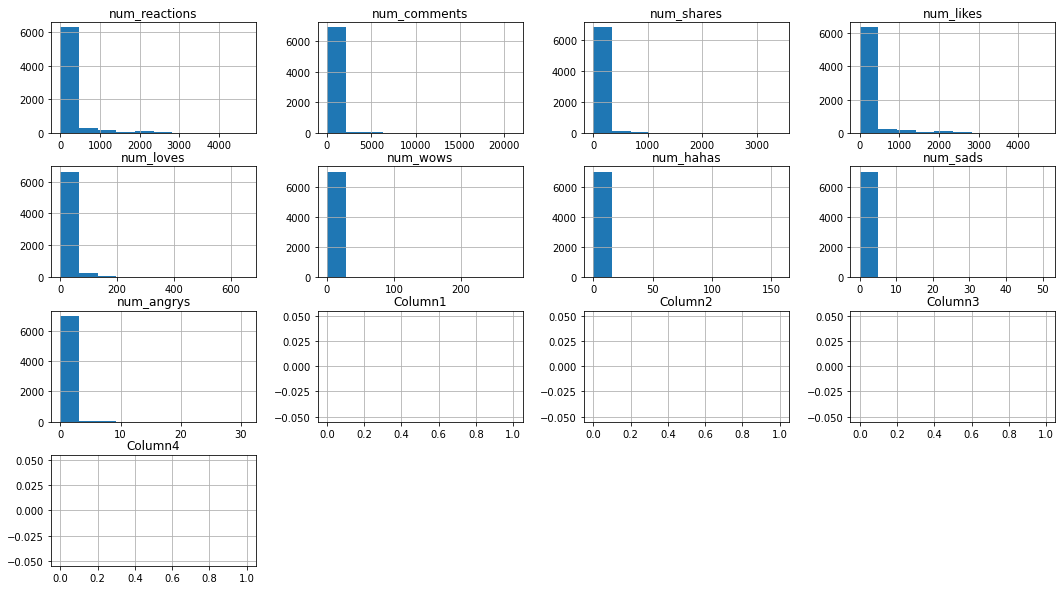

time: 2.05 s (started: 2022-08-31 15:50:06 +00:00)


In [14]:
#
#Hacemos histogramas de todas las variables
 
df1[df1.columns].hist(figsize=(18,10))

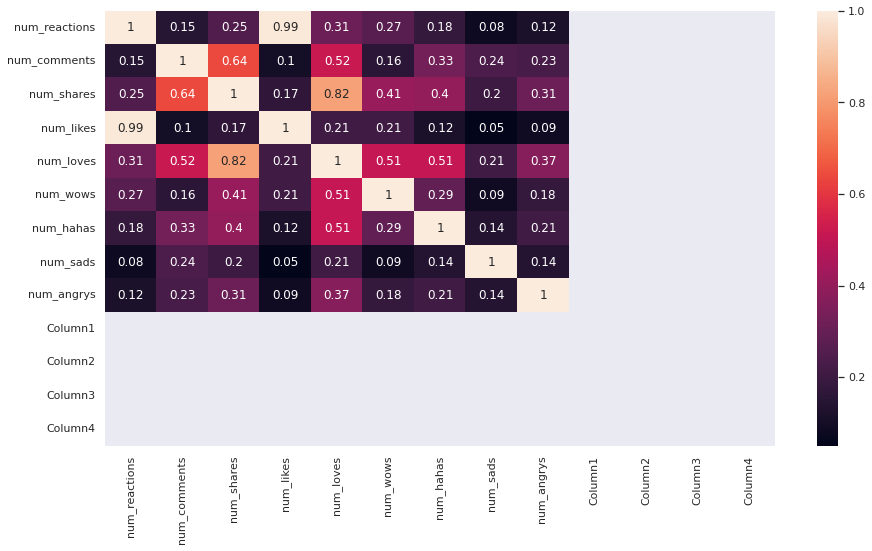

time: 933 ms (started: 2022-08-31 15:50:08 +00:00)


In [15]:
correlation_matrix = df1.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb#scrollTo=lzjdcUxTCQaG

Creacion de 4 nuevas  columnas:
year
month
day
hour

---



In [16]:
df1['status_published'] = pd.to_datetime(df1['status_published'])

df1['year'] = df1['status_published'].dt.year
df1['month'] = df1['status_published'].dt.month
df1['day'] = df1['status_published'].dt.day
df1['hour'] = df1['status_published'].dt.hour

#df1 = df1.drop(['status_id'], axis=1) #quito esta columna

time: 673 ms (started: 2022-08-31 15:50:09 +00:00)


# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

## 1.1 Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

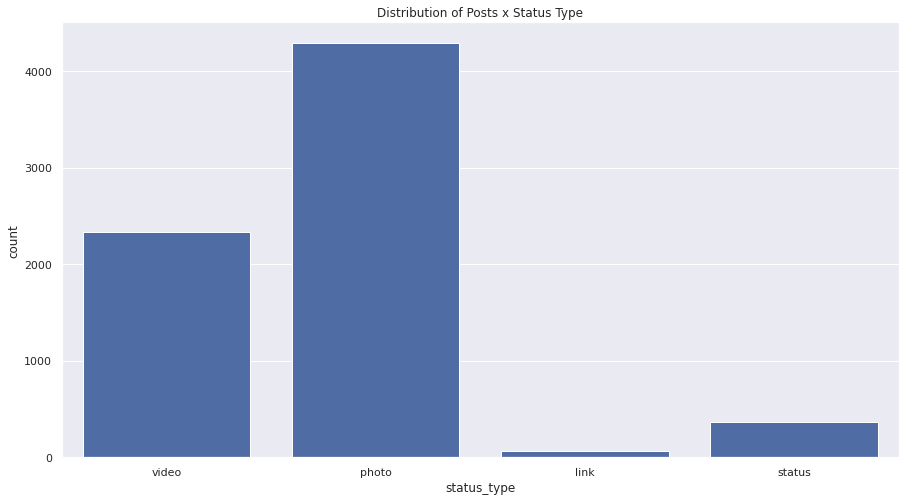

time: 193 ms (started: 2022-08-31 15:50:09 +00:00)


In [17]:
pal = ["#4267B2"]
pl = sns.countplot(x=df["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

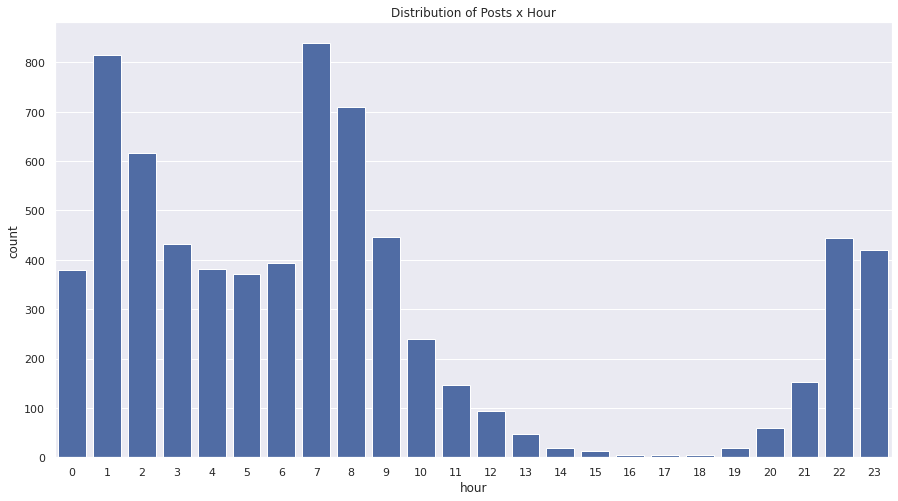

time: 383 ms (started: 2022-08-31 15:50:10 +00:00)


In [18]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["hour"], palette= pal)
pl.set_title("Distribution of Posts x Hour")
plt.show()

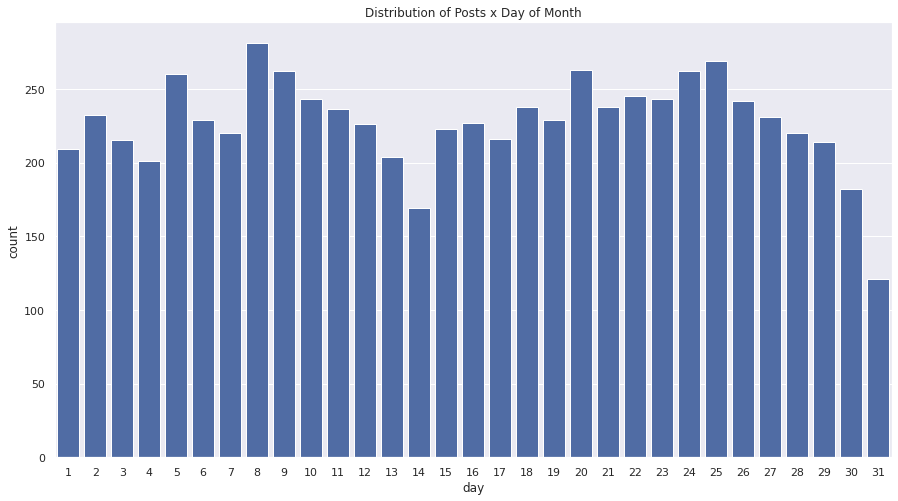

time: 407 ms (started: 2022-08-31 15:50:10 +00:00)


In [19]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["day"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

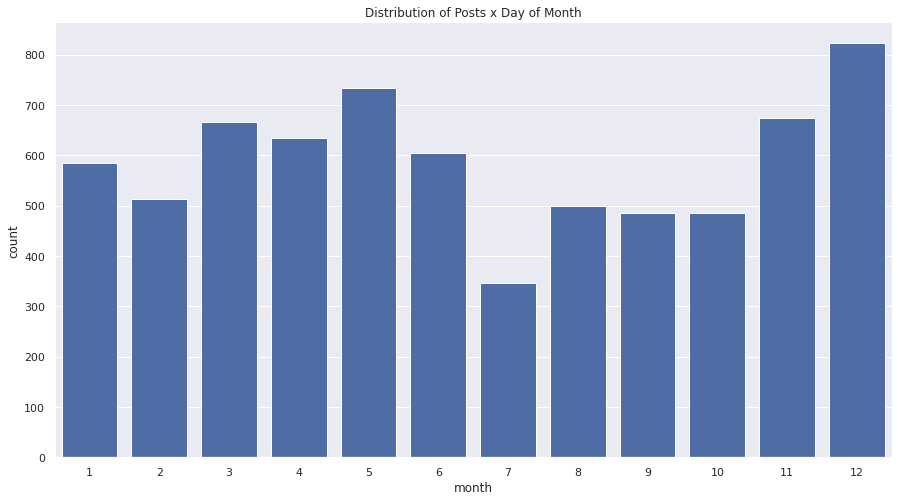

time: 299 ms (started: 2022-08-31 15:50:10 +00:00)


In [20]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["month"], palette= pal)
pl.set_title("Distribution of Posts x Day of Month")
plt.show()

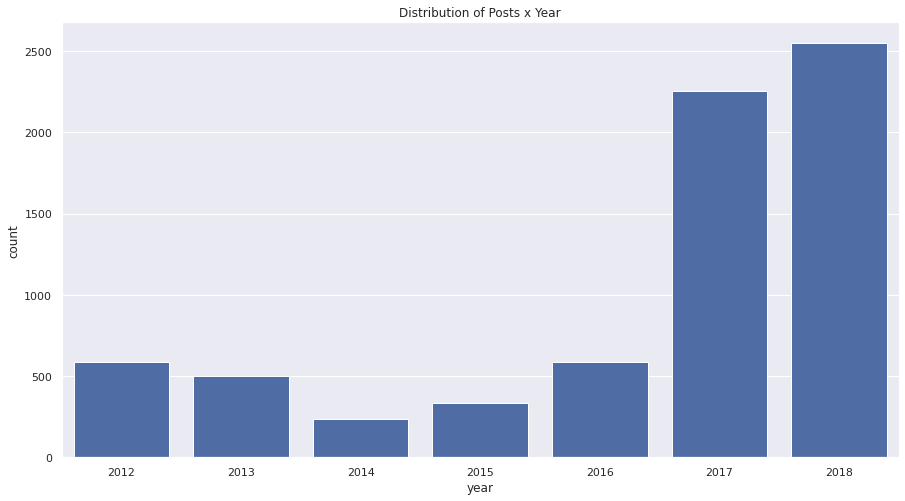

time: 225 ms (started: 2022-08-31 15:50:11 +00:00)


In [21]:
pal = ["#4267B2"]
pl = sns.countplot(x=df1["year"], palette= pal)
pl.set_title("Distribution of Posts x Year")
plt.show()

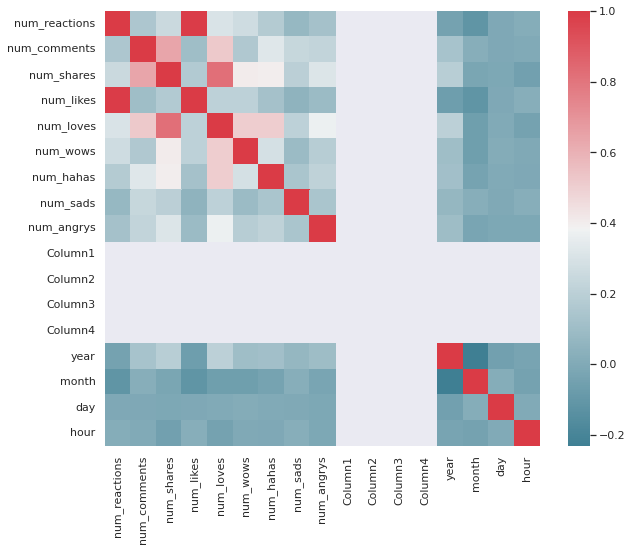

time: 533 ms (started: 2022-08-31 15:50:11 +00:00)


In [22]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
# Elimino las columnas vacias
df1= df1.drop(['Column1', 'Column2','Column3','Column4'], axis=1)

time: 5.39 ms (started: 2022-08-31 15:50:11 +00:00)


La correlacion esta en:
num_reactions
num_loves
year
num_comments

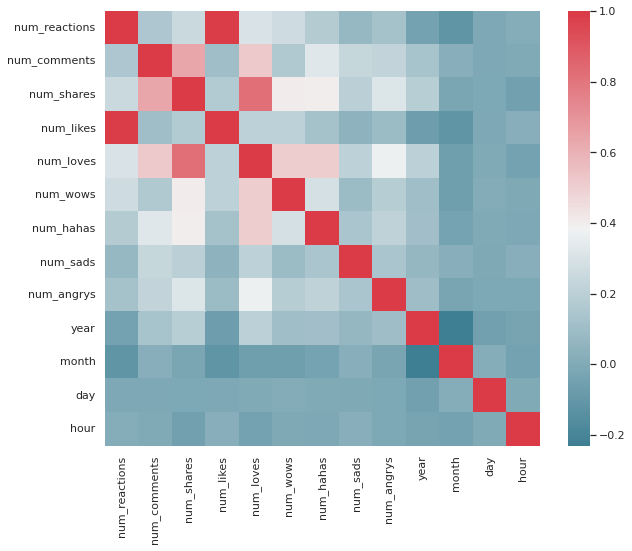

time: 532 ms (started: 2022-08-31 15:50:11 +00:00)


In [24]:
# heatmap to show the relational between features

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [25]:
#df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments', 'hour', 'day', 'month', 'ï»¿status_id'], axis=1)
df1 = df1.drop(['num_reactions', 'num_loves', 'year', 'num_comments',  'day',  'ï»¿status_id'], axis=1)

time: 2.89 ms (started: 2022-08-31 15:50:12 +00:00)


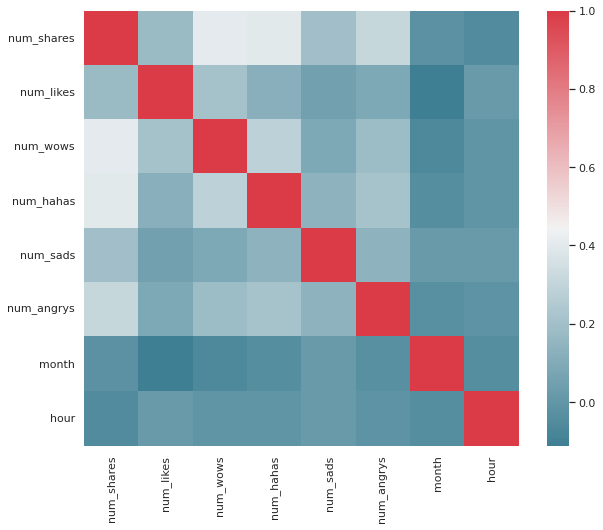

time: 393 ms (started: 2022-08-31 15:50:12 +00:00)


In [26]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [27]:
s_type = {'video': 1,'photo': 2, 'status': 3,'link': 4}

time: 1 ms (started: 2022-08-31 15:50:12 +00:00)


In [28]:
df1.status_type = [s_type[item] for item in df1.status_type]

time: 10 ms (started: 2022-08-31 15:50:12 +00:00)


In [29]:
df1 = df1.drop('status_published', axis=1)

time: 3.42 ms (started: 2022-08-31 15:50:12 +00:00)


In [30]:
df1.iloc[10:15]

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour
10,2,3,202,1,0,0,0,4,1
11,2,0,213,4,0,0,0,4,2
12,2,2,305,2,0,0,0,4,5
13,2,0,200,1,0,0,0,4,2
14,2,0,335,1,0,0,0,4,9


time: 13.7 ms (started: 2022-08-31 15:50:12 +00:00)


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status_type  7050 non-null   int64
 1   num_shares   7050 non-null   int64
 2   num_likes    7050 non-null   int64
 3   num_wows     7050 non-null   int64
 4   num_hahas    7050 non-null   int64
 5   num_sads     7050 non-null   int64
 6   num_angrys   7050 non-null   int64
 7   month        7050 non-null   int64
 8   hour         7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB
time: 13 ms (started: 2022-08-31 15:50:12 +00:00)


NameError: ignored

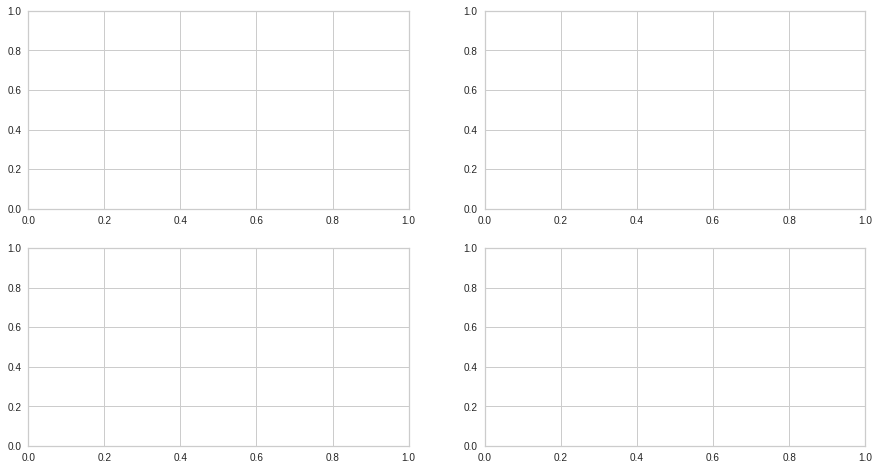

time: 1.23 s (started: 2022-08-31 15:50:13 +00:00)


In [32]:
# Selecciono el numero de cluster  con el analsiis Silhouette basado en KMeans

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizador = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizador.fit(data_scaled)

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## Elegir el mejor numero de cluster para el K-means

In [33]:
# choosing the best number of clusters using the silhouette score
from sklearn import metrics
from sklearn.cluster import KMeans

Knumber=[]
CHnumber=[]

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433008799659)
For n_clusters = 3, silhouette score is 0.8076058479134779)
For n_clusters = 4, silhouette score is 0.6338223113691358)
For n_clusters = 5, silhouette score is 0.6352910461105248)
For n_clusters = 6, silhouette score is 0.6367097670080004)
For n_clusters = 7, silhouette score is 0.6834367723238465)
For n_clusters = 8, silhouette score is 0.6559303836049823)
For n_clusters = 9, silhouette score is 0.6498711198650513)
time: 9.61 s (started: 2022-08-31 15:51:18 +00:00)


Text(0, 0.5, 'Calinski-Harabasz Indice')

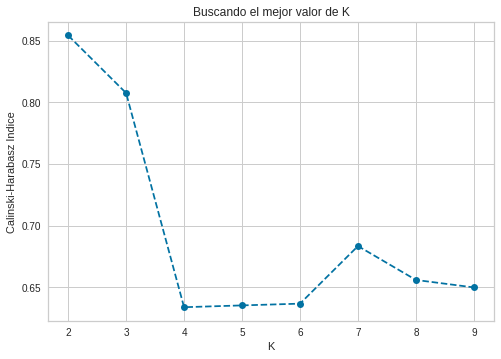

time: 332 ms (started: 2022-08-31 15:51:31 +00:00)


In [34]:
plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

In [35]:
# k-means clustering


clustering_kmeans = KMeans(n_clusters=3)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

time: 181 ms (started: 2022-08-31 15:51:35 +00:00)


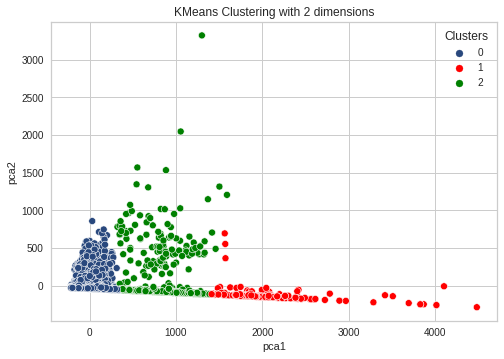

time: 699 ms (started: 2022-08-31 15:51:40 +00:00)


In [36]:
# Para una mejor intrerpretacion de los datos vamos a transformar la base de datos por medio del PCA (Principal Component Analisys)


reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
pal = ["#29487D", "red", 'green']

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()


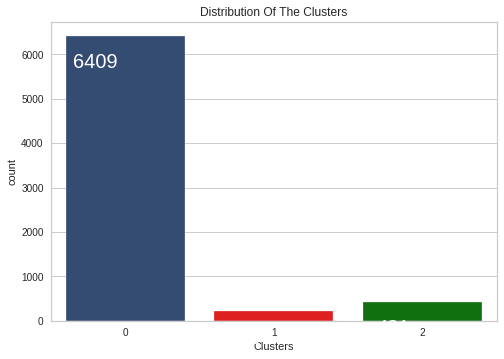

time: 158 ms (started: 2022-08-31 15:51:51 +00:00)


In [37]:
# Cantidad de datos por cluster
pl = sns.countplot(x=df1["Clusters"], palette= pal, data=df1)
pl.set_title("istribicón de los Clusters")


for p in pl.patches:
    pl.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+112), ha='center', va='top', color='white', size=20)

plt.show()

(0.00784313725490196, 0.4470588235294118, 0.6352941176470588)    color
(0.6235294117647059, 0.7647058823529411, 0.4666666666666667)    color
(0.792156862745098, 0.043137254901960784, 0.011764705882352941)    color
(0.6470588235294118, 0.00784313725490196, 0.34509803921568627)    color
(0.8431372549019608, 0.7803921568627451, 0.011764705882352941)    color
(0.5333333333333333, 0.792156862745098, 0.8549019607843137)    color


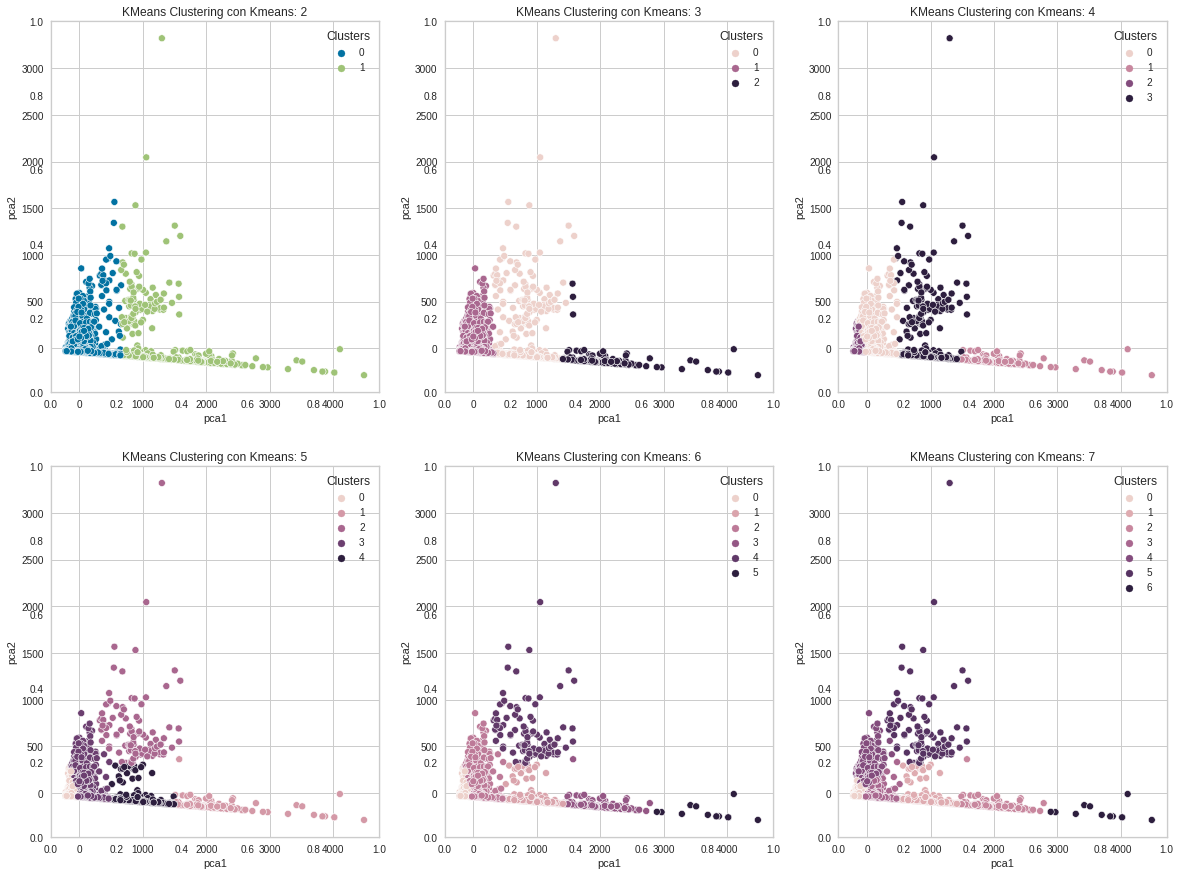

time: 7.6 s (started: 2022-08-31 16:38:02 +00:00)


In [93]:
# comparo para cada tipo de cluster para ver como afecta:
  # k-means clustering
import itertools
# set palette de colores
palette = itertools.cycle(sns.color_palette())

fig, axes = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

for n in range (2,8):
  # color
  c = next(palette)
  print(c, '   color')
  axes = fig.add_subplot(2, 3, n-1)
  clustering_kmeans = KMeans(n_clusters=n)
  df1['Clusters'] = clustering_kmeans.fit_predict(df1)
  sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, color=c)
  plt.title('KMeans Clustering con Kmeans: '+ str(n))
plt.show()



In [38]:
df1['Clusters'].value_counts()

0    6409
2     431
1     210
Name: Clusters, dtype: int64

time: 6.69 ms (started: 2022-08-31 15:51:55 +00:00)


## Function for undersampling

In [39]:
def downsample(df1, label_col_name):
    # encontrar el número de observaciones en el grupo más pequeño
    nmin = df1[label_col_name].value_counts().min()
    return (df1
            # dividir el df por grupos
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombinamos los df
            .reset_index(drop=True)
            )

time: 1.77 ms (started: 2022-08-31 15:51:59 +00:00)


In [40]:
df_us = downsample(df1, 'Clusters')

time: 14.6 ms (started: 2022-08-31 15:51:59 +00:00)


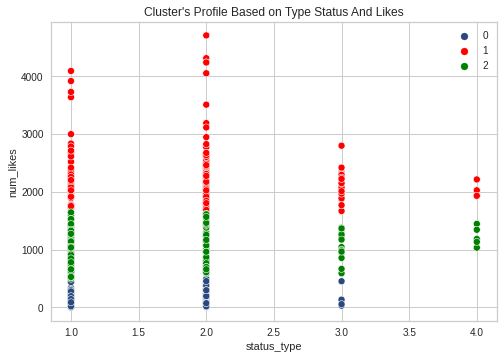

time: 355 ms (started: 2022-08-31 15:51:59 +00:00)


In [41]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["status_type"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Type Status And Likes")
plt.legend()
plt.show()

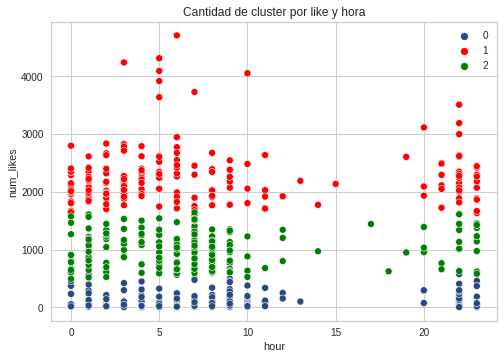

time: 337 ms (started: 2022-08-31 15:51:59 +00:00)


In [42]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cantidad de cluster por like y hora")
plt.legend()
plt.show()

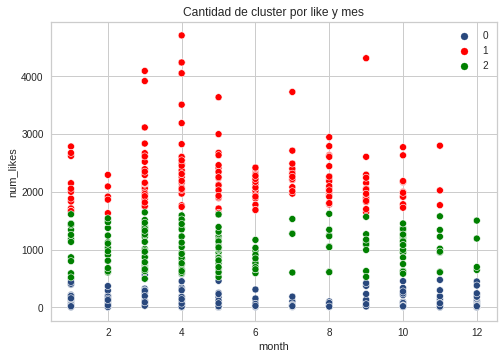

time: 346 ms (started: 2022-08-31 15:52:00 +00:00)


In [43]:
# bar plot 
pl = sns.scatterplot(data=df_us, x=df_us["month"], y=df_us["num_likes"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cantidad de cluster por like y mes")
plt.legend()
plt.show()

Perfil del clúster basado en interacciones y gustos
Podemos ver que, independientemente de la cantidad de likes, cuando tenemos alrededor de 1000 likes es cuando tenemos la mayor cantidad de wows.

No hay mucha diferencia entre los dos grupos en este análisis, el número de hahas por lo general nunca pasa de los 30

De nuevo, no hay mucha diferencia, el número de sads suele estar entre 0 y 5.

El número de angrys nunca fluctúa tanto, por lo general está alrededor de 0 - 5

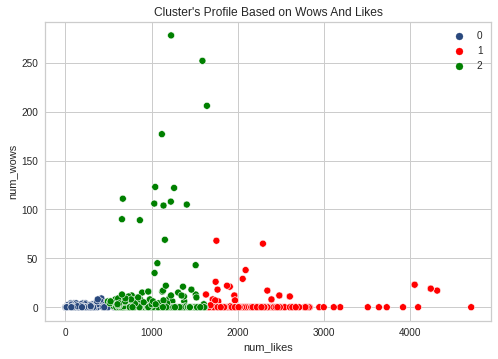

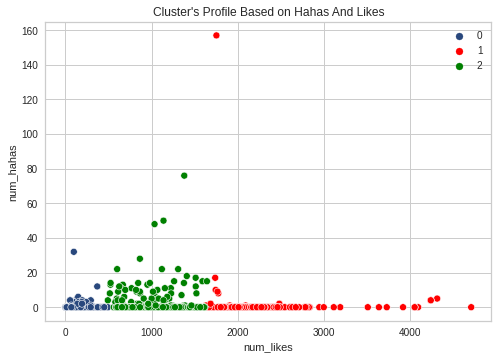

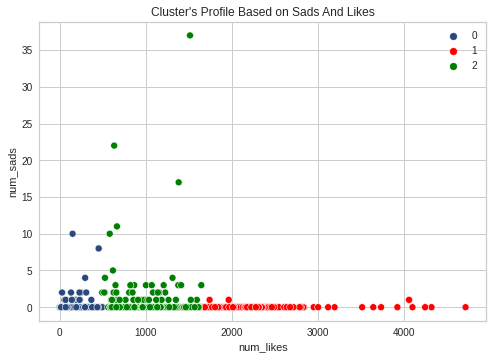

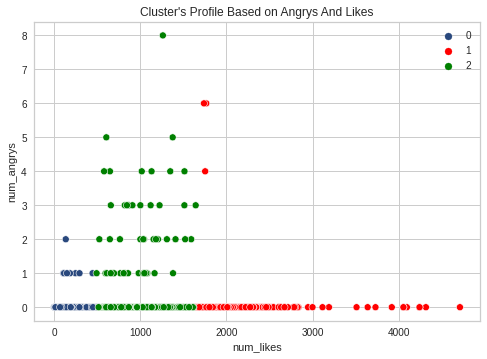

time: 1.33 s (started: 2022-08-31 15:52:00 +00:00)


In [44]:
pl = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Wows And Likes")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hahas And Likes")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Sads And Likes")
plt.legend()
plt.show()

pl4 = sns.scatterplot(data=df_us, x=df_us["num_likes"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl4.set_title("Cluster's Profile Based on Angrys And Likes")
plt.legend()
plt.show()

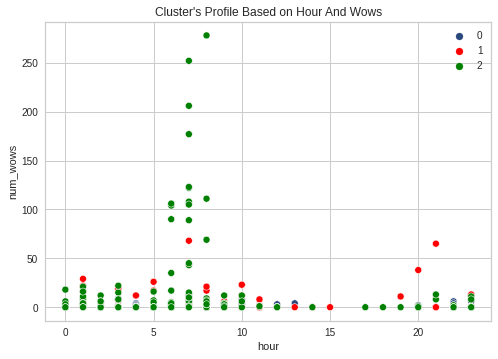

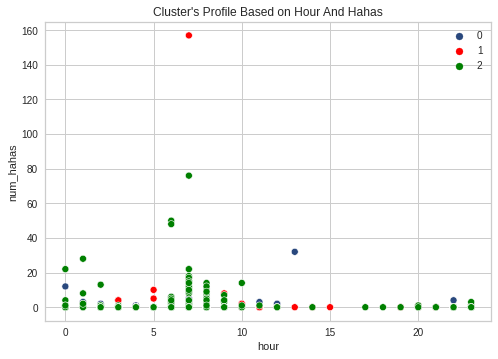

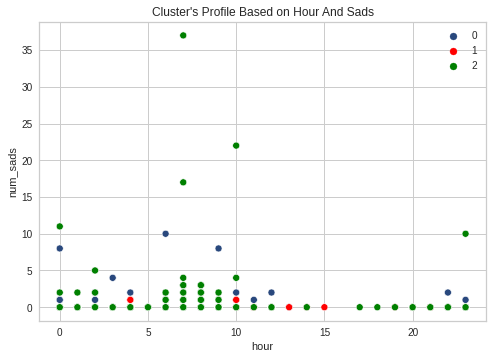

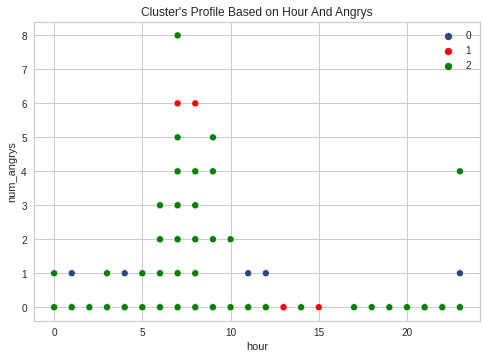

time: 1.3 s (started: 2022-08-31 15:52:01 +00:00)


In [45]:
# hour x num_x
pl = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_wows"], hue=df_us["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based on Hour And Wows")
plt.legend()
plt.show()

pl2 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_hahas"], hue=df_us["Clusters"], palette= pal)
pl2.set_title("Cluster's Profile Based on Hour And Hahas")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_sads"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Sads")
plt.legend()
plt.show()

pl3 = sns.scatterplot(data=df_us, x=df_us["hour"], y=df_us["num_angrys"], hue=df_us["Clusters"], palette= pal)
pl3.set_title("Cluster's Profile Based on Hour And Angrys")
plt.legend()
plt.show()



**Conclusión**

Se puede concluir que el clúster 0 tiene vendedores que en general son menos populares. Por otro lado, los vendedores del clúster 1 tienen vendedores que son súper populares.

Como vimos en el gráfico "Perfil del clúster basado en acciones y me gusta", los vendedores del clúster 0 tienen menos acciones y menos me gusta que los vendedores del clúster 1.

En el siguiente gráfico "Perfil del clúster basado en tipo de estado y me gusta", los vendedores del clúster 0, independientemente del tipo de estado, siempre tienen menos me gusta que los vendedores del clúster 1.

En el gráfico "Perfil del clúster basado en Me gusta y hora" pudimos concluir que nuevamente los vendedores del clúster 1 tienen más Me gusta que los vendedores del clúster 0 independientemente de la hora del día.

Pero también podemos concluir que entre las 15:00 y las 20:00 no es un buen momento para publicar porque no hay muchos "me gusta" a esta hora del día.

Con base en el gráfico "Perfil del clúster según los Me gusta y el mes", podemos concluir que no hay un mes que tenga muchos más Me gusta que el otro y, una vez más, los vendedores del clúster 1 tienen más Me gusta que el vendedor del clúster 0.

En cuanto al número de interacciones con las publicaciones (wow, hahas, sads y angrys), el número de likes no influye mucho.

En cuanto a la hora de la publicación, se puede ver claramente que entre las 5:00 y las 10:00 hay más interacciones que en cualquier otro momento del día.

# - Exercici 2


## Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

https://www.kaggle.com/code/bernardoaugusto/facebook-live-sellers

In [46]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

clustering_kmeans = AgglomerativeClustering(n_clusters=3)
df1['Clusters'] = clustering_kmeans.fit_predict(df1)

time: 1.74 s (started: 2022-08-31 15:52:17 +00:00)


In [47]:
df1['Clusters']


0       0
1       0
2       0
3       0
4       0
       ..
7045    0
7046    0
7047    0
7048    0
7049    0
Name: Clusters, Length: 7050, dtype: int64

time: 6.47 ms (started: 2022-08-31 15:52:21 +00:00)


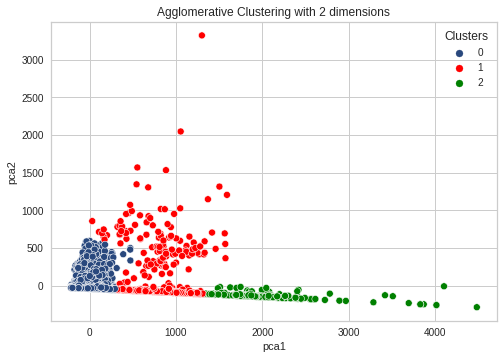

time: 576 ms (started: 2022-08-31 15:52:24 +00:00)


In [48]:
# Para visualizarlo mejor transformamos todas las columnas a dos por medio del PCA

reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette=pal)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.show()

**Resultado:**
Ver lo bien que hemos separado los 3 clusters



---



https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Documentacion de ITAcademy

---



## 2.1 Dendograma - Hierartichical Clustering.

In [49]:
# Normalizo los datos:

from sklearn.preprocessing import normalize
data_scaled = normalize(df1)
data_scaled = pd.DataFrame(data_scaled, columns=df1.columns)
data_scaled.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour,Clusters
0,0.001979,0.51850,0.854931,0.005937,0.001979,0.001979,0.0,0.007916,0.011874,0.0
1,0.013186,0.00000,0.988985,0.000000,0.000000,0.000000,0.0,0.026373,0.145051,0.0
2,0.004718,0.26894,0.962521,0.004718,0.004718,0.000000,0.0,0.018873,0.028309,0.0
3,0.018000,0.00000,0.999027,0.000000,0.000000,0.000000,0.0,0.036001,0.018000,0.0
4,0.009801,0.00000,0.999652,0.000000,0.000000,0.000000,0.0,0.019601,0.014701,0.0


time: 21.1 ms (started: 2022-08-31 15:52:37 +00:00)


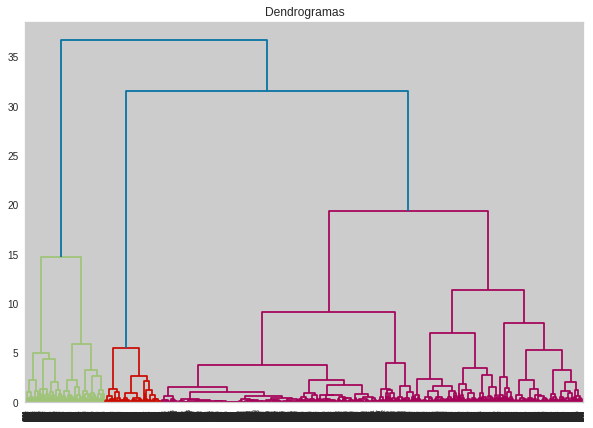

time: 3min 47s (started: 2022-08-31 15:52:37 +00:00)


In [50]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

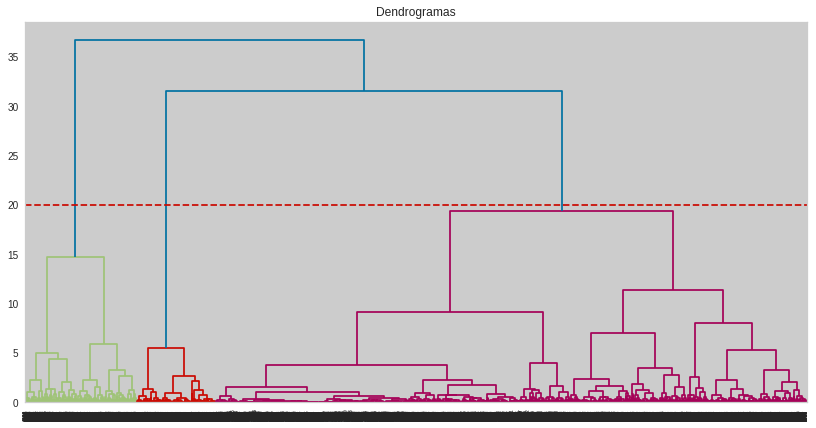

time: 3min 46s (started: 2022-08-31 15:56:25 +00:00)


In [51]:
plt.figure(figsize=(14, 7))  
plt.title("Dendrogramas")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([3, 3, 3, ..., 0, 3, 1])

time: 2.65 s (started: 2022-08-31 16:00:11 +00:00)


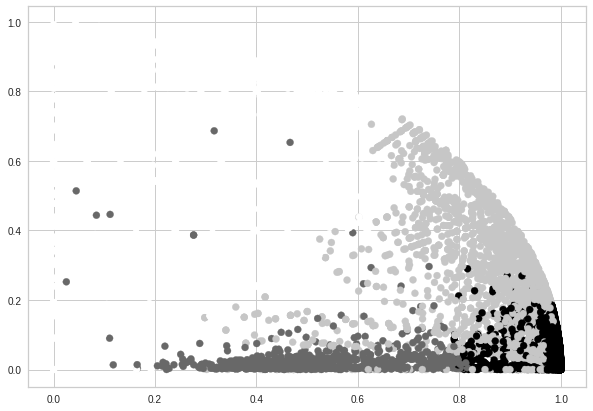

time: 1.04 s (started: 2022-08-31 16:00:13 +00:00)


In [53]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['num_likes'], data_scaled[ 'hour'], c=cluster.labels_) 

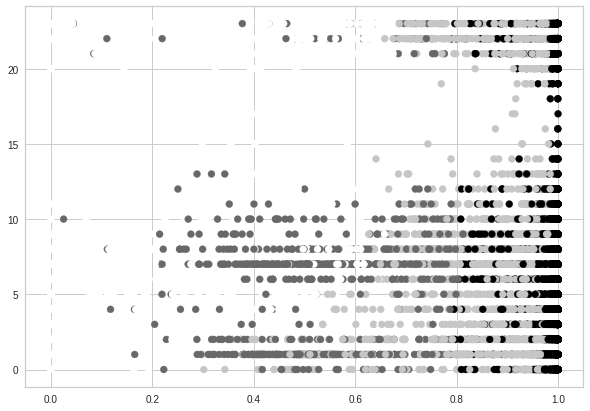

time: 1.19 s (started: 2022-08-31 16:00:14 +00:00)


In [54]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['num_likes'], df1[ 'hour'], c=cluster.labels_) 

# - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

## Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [55]:
# Elegir el mejor número de grupos utilizando silhouette score
from sklearn import metrics
Knumber=[]
CHnumber=[]

rango_n_clusters = list(range(2,10))

for n_clusters in rango_n_clusters:
    Knumber.append(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df1)
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(df1, preds)
    CHnumber.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8543433129246312)
For n_clusters = 3, silhouette score is 0.8070207440887254)
For n_clusters = 4, silhouette score is 0.6337773575714641)
For n_clusters = 5, silhouette score is 0.6358286509805122)
For n_clusters = 6, silhouette score is 0.6366397005078492)
For n_clusters = 7, silhouette score is 0.6834366909369866)
For n_clusters = 8, silhouette score is 0.6534860392841798)
For n_clusters = 9, silhouette score is 0.6452100277396643)
time: 12.1 s (started: 2022-08-31 16:00:16 +00:00)


Text(0, 0.5, 'Calinski-Harabasz Indice')

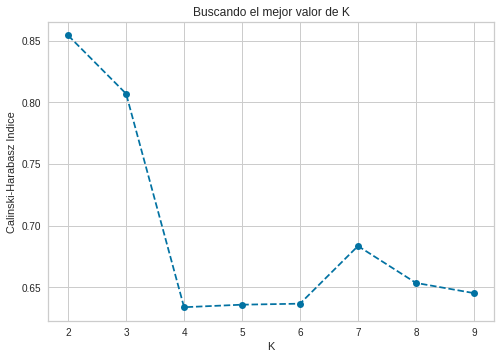

time: 373 ms (started: 2022-08-31 16:00:28 +00:00)


In [56]:
#%%timeit
#print('******')

plt.plot(Knumber,CHnumber,marker='o',ls='--')
plt.title('Buscando el mejor valor de K')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Indice')

#%lprun -f 

In [57]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(1000000)

ModuleNotFoundError: ignored

time: 22.7 ms (started: 2022-08-31 16:00:28 +00:00)


In [ ]:
# k-means clustering
clustering_kmeans = KMeans(n_clusters=3)
df['Clusters'] = clustering_kmeans.fit_predict(df1)

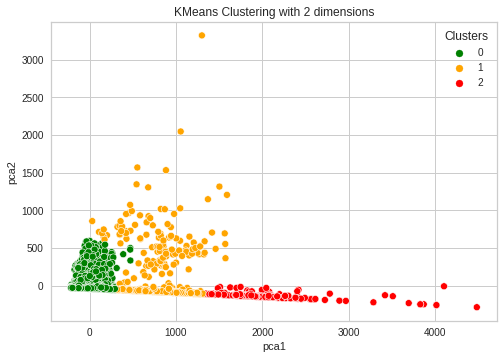

time: 1.13 s (started: 2022-08-31 16:01:21 +00:00)


In [58]:
reduced_data = PCA(n_components=2).fit_transform(df1)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

pal = ['green','orange', 'red']
sns.scatterplot(x="pca1", y="pca2", hue=df1['Clusters'], data=results, palette= pal)
plt.title('KMeans Clustering with 2 dimensions')
plt.show()

In [61]:
columnas=['pca1','pca2', 'h', 'i']
for x in range(0,len(columnas)-1):
  #print(x,x+1)
  print(columnas[x], columnas[x+1])
  pal = ['green','orange', 'red', 'blue']
  sns.scatterplot(x=columnas[x], y=columnas[x+1], hue=df1['Clusters'], data=results, palette= pal)
  plt.title('KMeans Clustering with 2 dimensions')
  #fig, (ax1, ax2) = plt.subplots(1, 2)
  #fig.set_size_inches(18, 7)
   
plt.show()

pca1 pca2


ValueError: ignored

time: 55.5 ms (started: 2022-08-31 16:03:23 +00:00)


In [62]:
X = [results['pca1'], results['pca2']]
X = pd.DataFrame(X)
print((X.head()))

            0          1          2           3          4          5     \
pca1  228.843785 -67.144738 -10.091904 -106.091591 -13.232971  -6.239808   
pca2  209.653981 -36.446199  17.555628  -34.238078 -39.364796 -39.722197   

            6          7          8          9     ...        7040  \
pca1  204.443980  45.603246 -19.223830 -50.121287  ... -125.190649   
pca2   20.998914  10.476748 -39.034232 -36.331207  ...    0.820620   

            7041        7042       7043        7044        7045        7046  \
pca1 -209.935690 -212.931747 -22.058073 -131.057309 -128.062507 -202.944299   
pca2  -28.526505  -28.355277 -35.881020  -32.867043  -33.026380  -28.909369   

            7047        7048        7049  
pca1 -215.921844  132.750687 -199.950299  
pca2  -28.240531  -25.387078  -29.083391  

[2 rows x 7050 columns]
time: 97.8 ms (started: 2022-08-31 16:03:38 +00:00)


In [63]:
df1

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,month,hour,Clusters
0,1,262,432,3,1,1,0,4,6,0
1,2,0,150,0,0,0,0,4,22,0
2,1,57,204,1,1,0,0,4,6,0
3,2,0,111,0,0,0,0,4,2,0
4,2,0,204,0,0,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...
7045,2,0,89,0,0,0,0,9,2,0
7046,2,0,14,0,1,0,0,9,11,0
7047,2,0,1,0,0,0,0,9,23,0
7048,2,22,349,0,0,0,0,9,0,0


time: 16.9 ms (started: 2022-08-31 16:03:42 +00:00)


ValueError: ignored

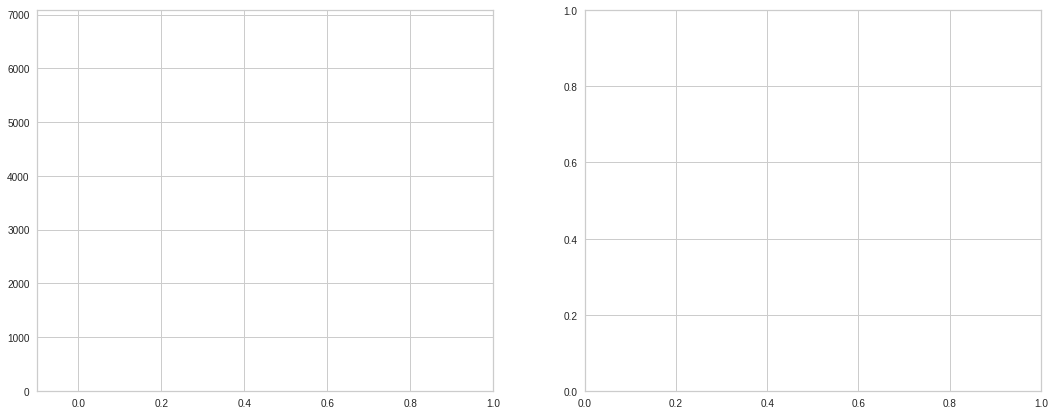

time: 1.03 s (started: 2022-08-31 16:03:46 +00:00)


In [64]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
'''
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility
'''
X, y = results['pca1'], results['pca2']

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()